In [2]:
import csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Histogram of Authorized Cap

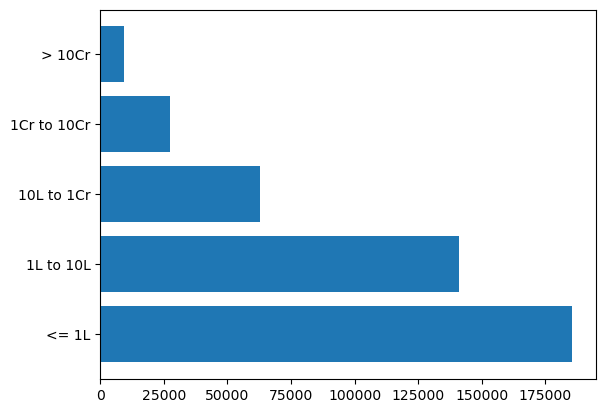

In [9]:

with open('./resources/Maharashtra.csv', encoding='unicode_escape') as file_obj: 
      
    lower_bound=[0, 1e5+1, 1e6+1, 1e7+1, 1e8+1]
    upper_bound=[1e5, 1e6, 1e7, 1e8, 1e18]
    labels=['<= 1L', '1L to 10L', '10L to 1Cr', '1Cr to 10Cr', '> 10Cr']
    count_arr=5*[0]
    companies = csv.DictReader(file_obj)

    for company in companies:
        for i in range (0, len(lower_bound)):
            if (float(company['AUTHORIZED_CAP']) >= lower_bound[i]) & (float(company['AUTHORIZED_CAP']) <= upper_bound[i]):
                count_arr[i] += 1

    plt.barh(labels, count_arr)


## Bar Plot of company registration by year

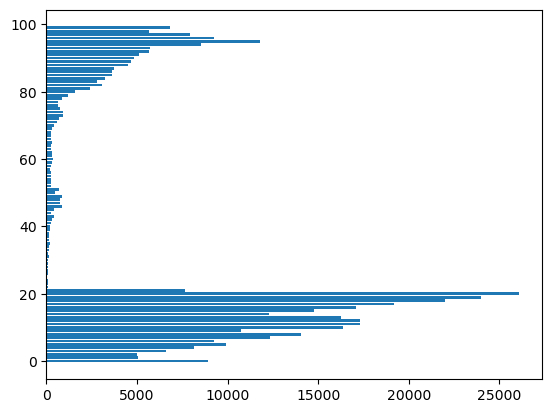

In [10]:
with open('./resources/Maharashtra.csv', encoding='unicode_escape') as file_obj: 

    companies = csv.DictReader(file_obj) 
    count_arr = 100*[0]
      
    for company in companies: 
        year=company['DATE_OF_REGISTRATION'][-2:]
        if(year=="NA"): continue
        count_arr[(int)(year)] += 1
        
    plt.barh(list(range(0,100)), count_arr)

## Company registration in the year 2015 by the district

<BarContainer object of 27 artists>

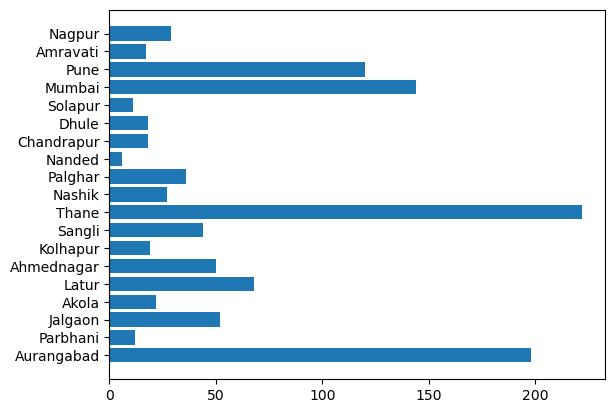

In [12]:
pincode_obj ={}

with open('./resources/Maharashtra.csv', encoding='unicode_escape') as file_obj: 
    companies = csv.DictReader(file_obj) 

    for company in companies:
        office_address = company['Registered_Office_Address']
        office_address_list = list(office_address.split(" "))
        pincode = office_address_list[len(office_address_list)-1]
        if ((pincode=='') | (company['DATE_OF_REGISTRATION'][-2:]!='15')):
            continue
        pincode_obj[pincode] = pincode_obj.get(pincode, 0) + 1

district_by_pincode = {}

with open('./resources/pincode.csv', encoding='unicode_escape') as file_obj:
    districts = csv.DictReader(file_obj) 

    for district in districts:
        district_by_pincode[district['Pin Code']]=district['District']

district_arr = []
count_arr = []
for pincode in pincode_obj:
    if pincode in district_by_pincode.keys():
        district_arr.append(district_by_pincode[pincode])
        count_arr.append(pincode_obj[pincode])

plt.barh(district_arr, count_arr)

### Grouped Bar Plot by aggregating registration counts over Year of registration vs. Principal Business Activity

<Axes: xlabel='year'>

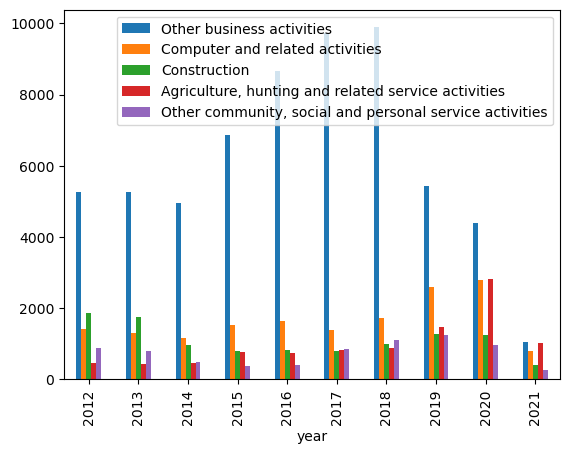

In [6]:
obj = {}
labels = {}
with open('./resources/Maharashtra.csv', encoding='unicode_escape') as file_obj:

    companies = csv.DictReader(file_obj)
    
    for company in companies:
        year=company['DATE_OF_REGISTRATION'][-2:]
        if(year=="NA"): continue

        year_int=(int)(year)
        if (year_int<=11) | (year_int>21):
            continue
        if year_int not in obj:
            obj[year_int]={}

        principal_business_activity = company['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']
        labels[principal_business_activity] = labels.get(principal_business_activity, 0) + 1
        obj[year_int][principal_business_activity] = obj[year_int].get(principal_business_activity, 0) + 1

labels=dict(sorted(labels.items(), key = lambda x: x[1], reverse = True))
labels=dict(list(labels.items())[0: 5])

obj=dict(sorted(obj.items(), key = lambda x: x[0]))

arr = []
dfcolumns= ['year']
for j in labels: 
    dfcolumns.append(j)

for i in obj:
    temp = [2000+i]
    for j in labels:
        temp.append(obj[i][j])
    arr.append(temp)

df = pd.DataFrame(arr, columns =dfcolumns)

df.plot(x='year', kind='bar', stacked=False,)